In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [6]:
#Bagging : 동일한 알고리즘으로 여러 분류기를 만들고, voting을 통해 최종 결정, Bootstrapping 방식의 샘플 데이터 학습
#RandomForest : Bagging method의 응용, 여러 개의 Decision Tree를 활용함

In [7]:
# 에디터 이용시 아래 코드로 대체
#uploaded = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
features = pd.read_csv('merged_claim_data.csv', sep = ',', encoding = 'utf-8', error_bad_lines=False, engine = 'python', header = None)
features = features.rename(columns=features.iloc[0])
features = features.drop(features.index[0])#첫 row는 컬럼명이 들어간 더미데이터이므로 삭제
features = features.astype('float')

#학습 및 테스트용 데이터를 데이터 프레임으로 로딩
x = features[['SIU_CUST_YN','SEX','AGE','FP_CAREER','MAX_PRM','RESL_CD1','ACCI_OCCP_GRP','CHME_LICE_NO','DMND_AMT','PAYM_AMT','NON_PAY_RATIO','HEED_HOSP_YN','CLAIM_CNT','TOTAL_VLID_HOSP_OTDA','HOSP_VARIES','HOSP_DVSN_VARIES','CHME_LICE_COUNT']]
y = features['SIU_CUST_YN']

y = y.astype(np.uint8)
#train_test_split의 stratify 옵션은 target data가 train/test에서 비율을 유지할 수 있게 해주므로, 어느 한 쪽에 과중되는 것을 방지한다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42,  shuffle = True)


In [8]:
# 학습 진행
rf = RandomForestClassifier(n_estimators=100, random_state = 42)#생성할 트리 갯수, 서로 다른 방향으로 트리를 만들어 overfitting 양을 줄일 수 있음
rf.fit(x_train, y_train)

importances = rf.feature_importances_

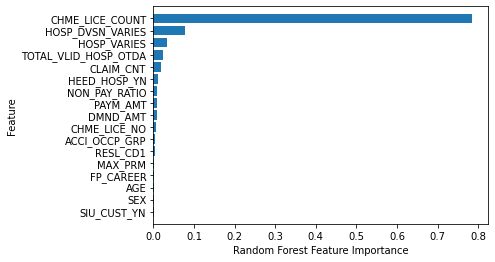

In [9]:
def plot_feature_importance(model):
    n_features = x_train.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(rf)

In [10]:
y_pred = rf.predict(x_test)
print(y_pred)
  
# 정확도 확인
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

[0 0 1 ... 0 0 1]
정확도 : 1.0


In [11]:
predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print("훈련 세트 정확도: {:.3f}".format(rf.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf.score(x_test, y_test)))
#임시 정확도 측정

#print(f'Mean accuracy score: {accuracy:.3}')

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000
